In [1]:
from obspy.clients.fdsn import Client
from obspy.clients.fdsn import RoutingClient
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [17]:
client = Client("KOERI")

In [112]:
# client = Client("KOERI")
# client = RoutingClient("eida-routing")

In [3]:
from obspy.clients.fdsn.header import URL_MAPPINGS
for key in sorted(URL_MAPPINGS.keys()):
    print("{0:<7} {1}".format(key,  URL_MAPPINGS[key]))

BGR     http://eida.bgr.de
EMSC    http://www.seismicportal.eu
ETH     http://eida.ethz.ch
GEONET  http://service.geonet.org.nz
GFZ     http://geofon.gfz-potsdam.de
ICGC    http://ws.icgc.cat
INGV    http://webservices.ingv.it
IPGP    http://ws.ipgp.fr
IRIS    http://service.iris.edu
ISC     http://isc-mirror.iris.washington.edu
KNMI    http://rdsa.knmi.nl
KOERI   http://eida.koeri.boun.edu.tr
LMU     http://erde.geophysik.uni-muenchen.de
NCEDC   http://service.ncedc.org
NIEP    http://eida-sc3.infp.ro
NOA     http://eida.gein.noa.gr
ODC     http://www.orfeus-eu.org
ORFEUS  http://www.orfeus-eu.org
RESIF   http://ws.resif.fr
SCEDC   http://service.scedc.caltech.edu
TEXNET  http://rtserve.beg.utexas.edu
USGS    http://earthquake.usgs.gov
USP     http://sismo.iag.usp.br


In [4]:
from obspy import UTCDateTime, Stream

In [21]:
minlong=31.77
maxlong=34.82
minlat=34.52
maxlat=35.82

In [6]:
starttime =UTCDateTime("2008-01-01T00:00:00")
endtime= UTCDateTime("2019-11-18T00:00:00")

In [9]:
events=client.get_events(starttime=starttime,endtime=endtime,minlatitude=minlat,maxlatitude=maxlat,minlongitude=minlong,maxlongitude=maxlong,
                 minmagnitude=4)
print(events.__str__(print_all=True))

19 Event(s) in Catalog:
2017-05-20T05:41:13.300000Z | +34.890,  +33.920 | 4.0 ml
2017-01-13T21:43:31.700000Z | +35.550,  +32.450 | 4.4 mb
2016-11-06T19:46:01.500000Z | +34.730,  +33.660 | 4.0 ml
2016-05-12T00:18:38.800000Z | +34.990,  +33.540 | 4.2 mb
2016-03-22T20:24:20.300000Z | +34.970,  +33.840 | 4.1 mb
2016-03-22T13:25:17.900000Z | +35.650,  +31.770 | 4.5 mb
2015-07-21T16:29:16.700000Z | +34.690,  +32.910 | 4.3 mb
2015-04-15T08:33:49.800000Z | +34.680,  +32.430 | 4.0 ml
2015-04-15T08:25:13.100000Z | +34.740,  +32.390 | 5.5 mb
2014-06-30T16:35:23.400000Z | +35.010,  +33.930 | 4.1 ml
2014-06-19T20:30:47.900000Z | +35.760,  +32.020 | 4.6 ml
2014-06-05T11:17:37.400000Z | +35.090,  +33.910 | 4.0 ml
2014-02-03T18:29:45.000000Z | +34.880,  +32.520 | 4.1 mw
2013-11-22T12:00:23.200000Z | +35.360,  +31.800 | 4.2 mb
2013-10-15T01:15:34.900000Z | +34.870,  +34.000 | 4.3 ml
2012-07-28T23:29:49.700000Z | +34.840,  +34.370 | 4.4 mb
2012-05-09T10:48:11.200000Z | +34.590,  +32.830 | 4.4 mb
2009-09

In [10]:
events.write('events.xml',format="QUAKEML")

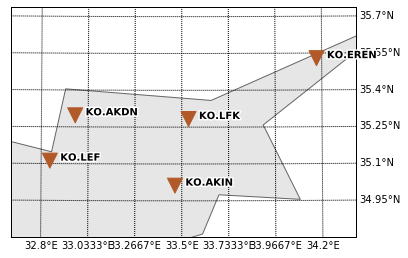

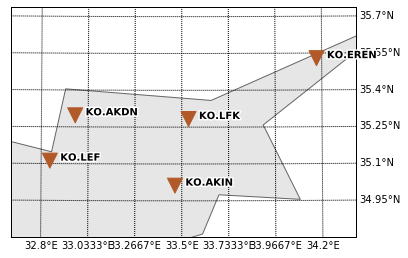

In [23]:
# events.plot(projection='local',outfile='Earthquakes.PNG')
# plt.close()
client.get_stations(network="KO",station="*",starttime=t-10,endtime=t+60*2,level="response",channel="*",
                   minlatitude=minlat,maxlatitude=maxlat,minlongitude=minlong,maxlongitude=maxlong).plot(projection='local',outfile="Stations.PNG")

In [15]:
t = UTCDateTime("2017-01-13T21:43:31")
# end = UTCDateTime("2017-01-13T21:43:31")

In [165]:
inv_AKDN = client.get_stations(network="KO",station="AKDN",starttime=t-10,endtime=t+60*2,level="response",channel="HN?")
stream_AKDN = client.get_waveforms(network="KO",station="AKDN",location="*",channel="HN?",starttime=t-10,endtime=t+60*2)


In [166]:
inv_EREN = client.get_stations(network="KO",station="EREN",starttime=t-10,endtime=t+60*2,level="response",channel="*")
stream_EREN = client.get_waveforms(network="KO",station="EREN",location="*",channel="*",starttime=t-10,endtime=t+60*2)


In [167]:
inv_LFK = client.get_stations(network="KO",station="LFK",starttime=t-10,endtime=t+60*2,level="response",channel="*")
stream_LFK = client.get_waveforms(network="KO",station="LFK",location="*",channel="*",starttime=t-10,endtime=t+60*2)

In [168]:
stream_LFK.merge()
stream_LFK

3 Trace(s) in Stream:
KO.LFK..HHE | 2017-01-13T21:43:19.290000Z - 2017-01-13T21:45:31.010000Z | 100.0 Hz, 13173 samples
KO.LFK..HHN | 2017-01-13T21:43:17.400000Z - 2017-01-13T21:45:32.670000Z | 100.0 Hz, 13528 samples
KO.LFK..HHZ | 2017-01-13T21:43:18.760000Z - 2017-01-13T21:45:32.380000Z | 100.0 Hz, 13363 samples

In [169]:
st_AKDN=Stream()
st_EREN=Stream()
st_LFK=Stream()

for ch in range(len(stream_AKDN)):
    trace1 = stream_AKDN[ch]
    st_AKDN += trace1
                
for ch in range(len(stream_EREN)):
    trace2 = stream_EREN[ch]
    st_EREN += trace2
                
for ch in range(len(stream_LFK)):    
    trace3 = stream_LFK[ch]
    st_LFK += trace3
# st_plot = st.plot()

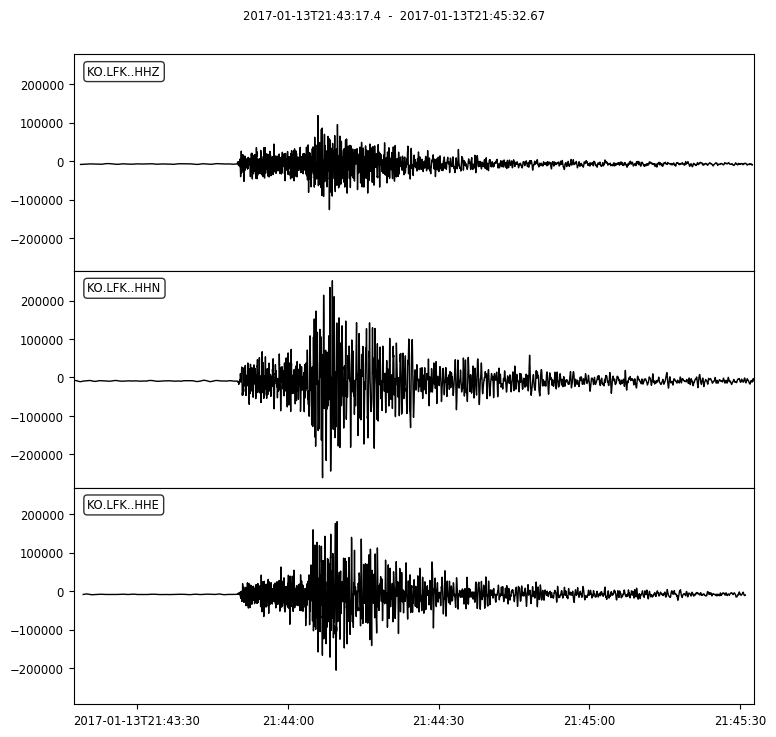

In [170]:
st_LFK.plot()
plt.close()

In [171]:
st_AKDN.attach_response(inv_AKDN)
st_EREN.attach_response(inv_EREN)
st_LFK.attach_response(inv_LFK)

[]

In [172]:
AKDN_removed = st_AKDN.remove_response(output='ACC')
EREN_removed = st_EREN.remove_response(output='ACC')
LFK_removed = st_LFK.remove_response(output='ACC')


In [173]:
AKDN_removed.plot(outfile="AKDN_RESPONSE.PNG")
EREN_removed.plot(outfile="EREN_RESPONSE.PNG")
LFK_removed.plot(outfile="LFK_RESPONSE.PNG")
plt.close()

In [174]:
import numpy as np

In [ ]:
channels = inv.get_contents().get('channels')
for i in range(3):
    test[i].write("{} {}".format(channels[i],'response.ascii'), format='TSPAIR')

In [176]:
channels_AKDN = inv_AKDN.get_contents().get('channels')
channels_EREN = inv_EREN.get_contents().get('channels')
channels_LFK = inv_LFK.get_contents().get('channels')


for i in range(3):
    AKDN_removed[i].write("{}{}".format(channels_AKDN[i],'_Response.ascii'),  format='TSPAIR')
    np.savetxt("{}{}.txt".format(channels_AKDN[i],'_Response'),np.array(AKDN_removed[i]))    
    EREN_removed[i].write("{}{}".format(channels_EREN[i],'_Response.ascii'),  format='TSPAIR')
    np.savetxt("{}{}.txt".format(channels_EREN[i],'_Response'),np.array(EREN_removed[i]))
    LFK_removed[i].write("{}{}".format(channels_LFK[i],'_Response.ascii'),  format='TSPAIR')
    np.savetxt("{}{}.txt".format(channels_LFK[i],'_Response'),np.array(LFK_removed[i]))    


In [154]:
LFK_removed

15 Trace(s) in Stream:
KO.LFK..HHE | 2017-01-13T21:43:19.290000Z - 2017-01-13T21:43:49.990000Z | 100.0 Hz, 3071 samples
KO.LFK..HHE | 2017-01-13T21:43:55.000000Z - 2017-01-13T21:43:59.990000Z | 100.0 Hz, 500 samples
KO.LFK..HHE | 2017-01-13T21:43:50.000000Z - 2017-01-13T21:43:54.990000Z | 100.0 Hz, 500 samples
KO.LFK..HHE | 2017-01-13T21:44:00.000000Z - 2017-01-13T21:45:31.010000Z | 100.0 Hz, 9102 samples
KO.LFK..HHN | 2017-01-13T21:43:17.400000Z - 2017-01-13T21:44:26.990000Z | 100.0 Hz, 6960 samples
KO.LFK..HHN | 2017-01-13T21:44:32.000000Z - 2017-01-13T21:44:36.990000Z | 100.0 Hz, 500 samples
KO.LFK..HHN | 2017-01-13T21:44:27.000000Z - 2017-01-13T21:44:31.990000Z | 100.0 Hz, 500 samples
KO.LFK..HHN | 2017-01-13T21:44:37.000000Z - 2017-01-13T21:45:32.670000Z | 100.0 Hz, 5568 samples
KO.LFK..HHZ | 2017-01-13T21:43:18.760000Z - 2017-01-13T21:45:32.380000Z | 100.0 Hz, 13363 samples
KO.LFK..HHE | 2017-01-13T21:43:19.290000Z - 2017-01-13T21:43:49.990000Z | 100.0 Hz, 3071 samples
KO.LFK..HH

In [50]:
import numpy as np

In [58]:
np.savetxt("test.txt",np.array(LFK_removed[0,3]))

In [123]:
H=np.array([])
for i in range(3):
    x = np.array(LFK_removed[i])
    H=np.append(H,x)

In [152]:
LFK_removed[3]

KO.LFK..HHE | 2017-01-13T21:44:00.000000Z - 2017-01-13T21:45:31.010000Z | 100.0 Hz, 9102 samples

In [151]:
LFK_removed.append(LFK_removed(:3))


SyntaxError: invalid syntax (<ipython-input-151-74efd5a1e43c>, line 1)